# Build the W-walk Reference Table
---

In [2]:
import pandas as pd

In [3]:
f = pd.read_pickle('data/model/f.pickle')
stops = pd.read_feather('data/model/stops.ftr')

In [4]:
# Spreadsheet re-ran with only those stops used to build transit weights & neighbors data
stops = pd.read_pickle('data/model/model_stops.pickle')

In [5]:
f

1.4267500000002541e-05

In [6]:
stops.head(1)

,stop_id,stop_code,stop_name,stop_lat,stop_lon
1,263,929,Davenport Rd at Bedford Rd,43.674448,-79.399659


In [7]:
stops = stops.set_index('stop_id')

In [8]:
stops.head(1)

,stop_code,stop_name,stop_lat,stop_lon
stop_id,,,,
263,929,Davenport Rd at Bedford Rd,43.674448,-79.399659


In [9]:
stop_list = tuple(stops.index.to_list())

In [12]:
r = f * 60 * 5

In [13]:
stops['walk'] = None
stops['len'] = 0

In [14]:
for stop in stop_list:
    lat = stops.loc[stop, 'stop_lat']
    lon = stops.loc[stop, 'stop_lon']
    range_filter = ( (stops.stop_lat < (lat + r) ) & (stops.stop_lat > (lat - r) ) & (stops.stop_lon < (lon + r) ) & (stops.stop_lon > (lon - r) ) )
    walkable_neighbors = tuple(stops.loc[range_filter].index)
    stops.at[stop, 'walk'] = walkable_neighbors
    stops.at[stop, 'len'] = len(walkable_neighbors)

<AxesSubplot:>

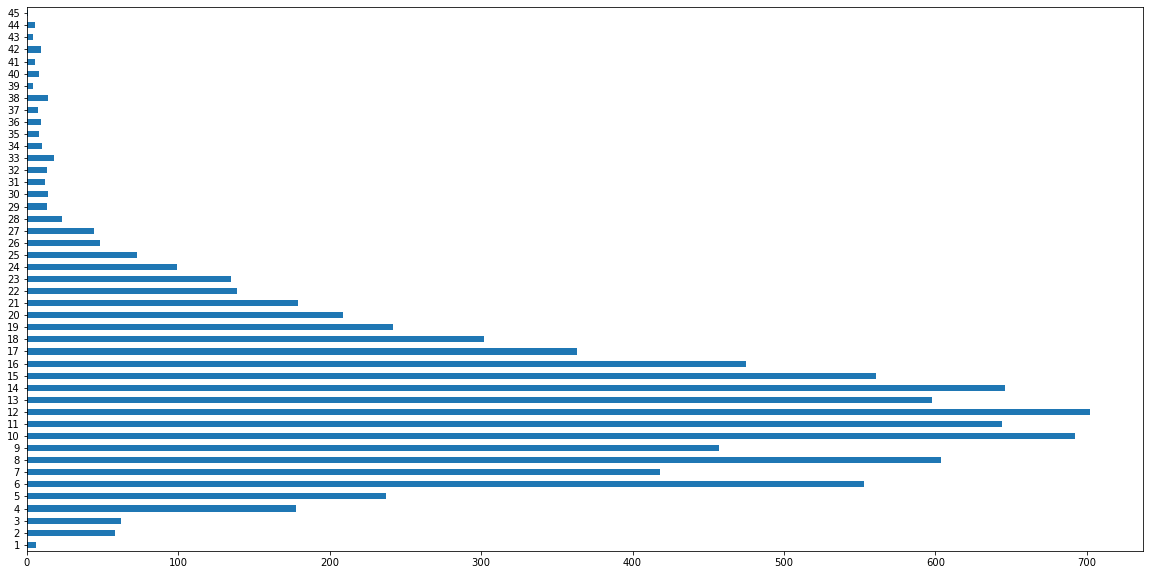

In [15]:
stops.len.value_counts().sort_index().plot(kind = 'barh', figsize = (20, 10))

In [16]:
stops

,stop_code,stop_name,stop_lat,stop_lon,walk,len
stop_id,,,,,,
263,929,Davenport Rd at Bedford Rd,43.674448,-79.399659,"(263, 264, 751, 1405, 1642, 1646, 1937, 2106, ...",21
264,940,Davenport Rd at Dupont St,43.675511,-79.401938,"(263, 264, 751, 1642, 3631, 4165, 4968, 5616, ...",18
265,1871,Davisville Ave at Cleveland St,43.702088,-79.378112,"(265, 3463, 4995, 5177, 7466, 7942, 8013, 10375)",8
266,11700,Disco Rd at Attwell Dr,43.701362,-79.594843,"(266, 267, 375, 376, 4040, 5109, 7076, 7641)",8
267,3478,Disco Rd at Attwell Dr,43.701043,-79.595806,"(266, 267, 375, 376, 4040, 5109, 7076, 7641, 7...",9
...,...,...,...,...,...,...
24418,16031,Gerrard St East at River St,43.663948,-79.358666,"(688, 1061, 2676, 2976, 6259, 7379, 8991, 2427...",14
24419,16032,Broadview Ave at Gerrard St East North Side,43.665766,-79.352651,"(688, 1966, 3446, 3886, 3903, 4197, 4575, 4891...",21
24420,16033,Jack Layton Way at St Matthews Rd,43.665695,-79.354843,"(688, 1966, 3446, 3886, 3903, 4197, 4575, 4891...",22


In [21]:
# Making sure that every stop has at least one neighbor within walking distance
stops.len.value_counts().sort_index().head(3)

1     6
2    58
3    62
Name: len, dtype: int64

In [22]:
# The max number of neighbors for any given stop
stops.len.value_counts().sort_index().tail(3)

43    4
44    5
45    1
Name: len, dtype: int64

In [17]:
stops.to_pickle('data/model/weights_walking.pickle')